In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Adjusting settings to display plots in Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [13]:
# Reading the stocks (Amazon, Facebook) and Benchmark (S&P 500) data, using the 'Date' column as index
stock_data = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')
benchmark_data = pd.read_csv('benchmark_data.csv', parse_dates=['Date'], index_col='Date')

# clean datasets by removing missing values
stock_data = stock_data.dropna()
benchmark_data = benchmark_data.dropna()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

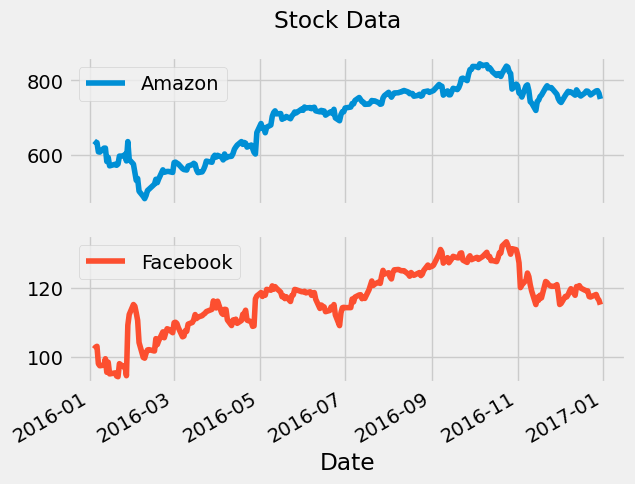

In [10]:
# Explore and visualise stocks dataset
stock_data.info()
stock_data.describe()
stock_data.plot(title='Stock Data', subplots=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


<AxesSubplot:title={'center':'S&P 500'}, xlabel='Date'>

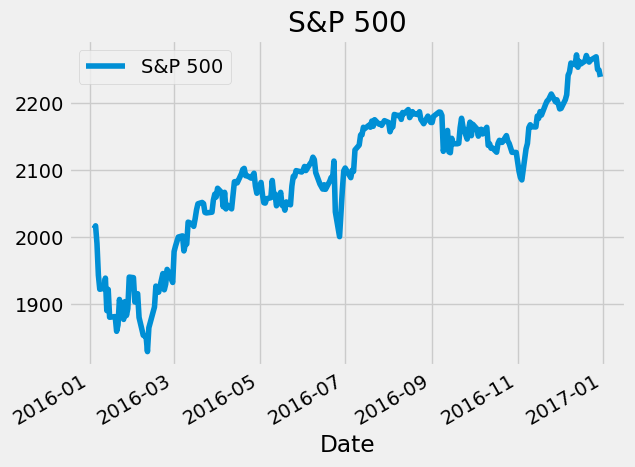

In [11]:
#Explore and visualise benchmark dataset

benchmark_data.info()
benchmark_data.describe()
benchmark_data.plot(title='S&P 500')

In [12]:
# Get the daily return of the stocks and benchmarks by calculating the daily percentage change in value
stock_returns = stock_data.pct_change()
sp_returns = benchmark_data['S&P 500'].pct_change()

In [14]:
# Calculate the performance of stocks vs the benchmark by substracting benchmark returns to stock returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

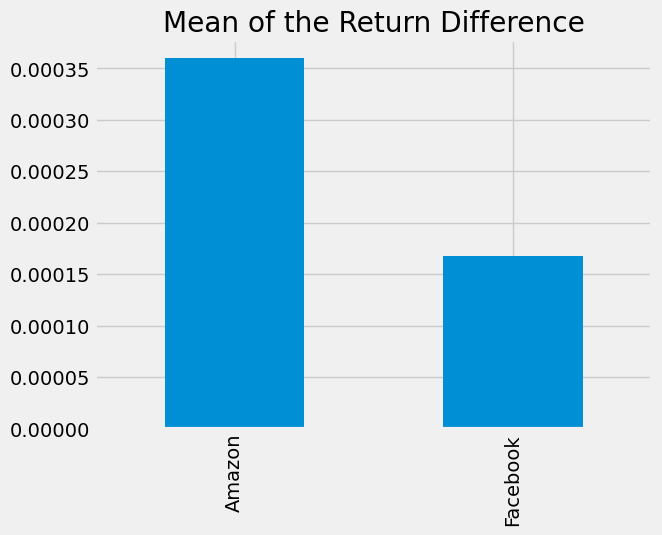

In [15]:
# Calculate the mean of excess returns (sharpe ratio numerator)
avg_excess_return = excess_returns.mean()

# Visualise average excess return for each stock
avg_excess_return.plot(kind='bar', title='Mean of the Return Difference')

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

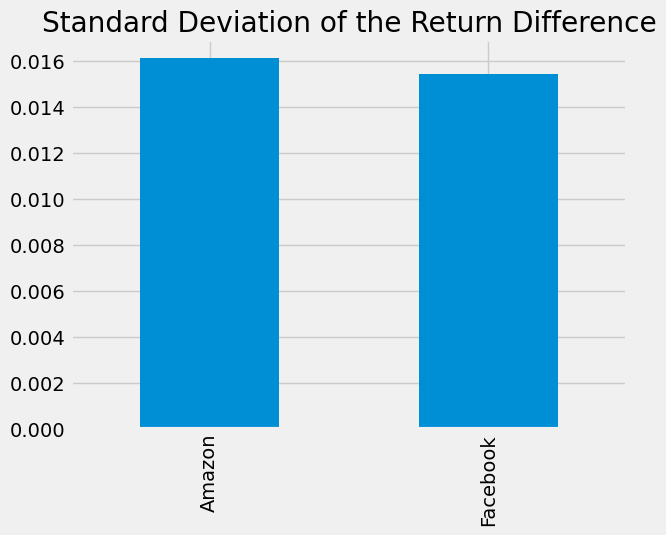

In [16]:
# Calculate the standard deviation of excess returns (sharpe ratio denominator)
sd_excess_return = excess_returns.std()

# Visualise the standard deviation of the return for each stock to compare level of risk relative to S&P 500
sd_excess_return.plot(kind='bar', title='Standard Deviation of the Return Difference')

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

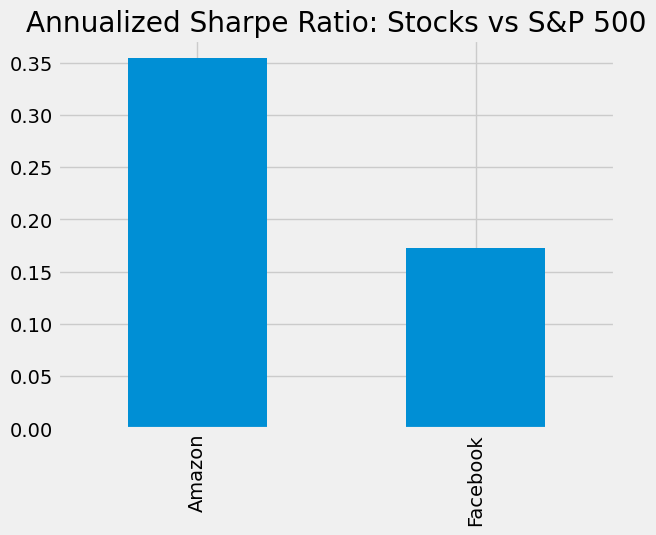

In [17]:
# Calculate the sharpe ratio by dividing average excess returns by standard deviation of excess returns
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Caclulate annualised sharpe ratio by multiplying the ratio by the square root of the number of trading days
annual_sharpe_ratio = daily_sharpe_ratio.mul(np.sqrt(252))

# Visualise the annualised sharpe ratio
annual_sharpe_ratio.plot(kind='bar', title='Annualized Sharpe Ratio: Stocks vs S&P 500')